In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/NSDE/functions/')

Mounted at /content/drive


In [2]:
#Libraries
import yfinance as yf
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import datetime
import math
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from scipy.stats import lognorm
from get_data import load_data

In [3]:
df = load_data('G.MI')

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4698 entries, 2005-01-03 to 2023-06-30
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj_close  4698 non-null   float64
 1   ret        4697 non-null   float64
 2   log_close  4698 non-null   float64
 3   log_ret    4697 non-null   float64
dtypes: float64(4)
memory usage: 183.5 KB


In [5]:
df.head()

,Adj_close,ret,log_close,log_ret
Date,,,,
2005-01-03,10.141847,NaN,2.316670,NaN
2005-01-04,10.186238,0.044392,2.321038,0.004368
2005-01-05,10.133777,-0.052462,2.315874,-0.005164
2005-01-06,10.077276,-0.056500,2.310283,-0.005591
2005-01-07,10.069205,-0.008071,2.309482,-0.000801


<Axes: xlabel='Date'>

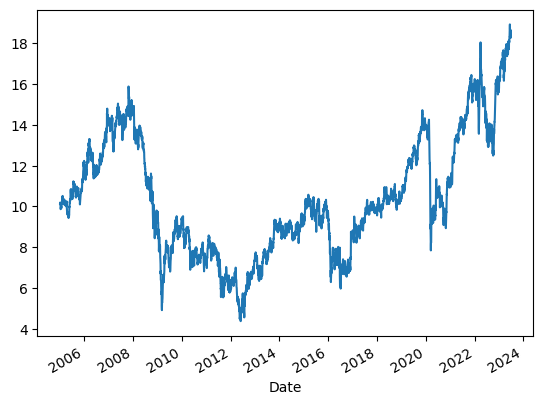

In [6]:
df['Adj_close'].plot()

Text(0.5, 1.0, 'Returns')

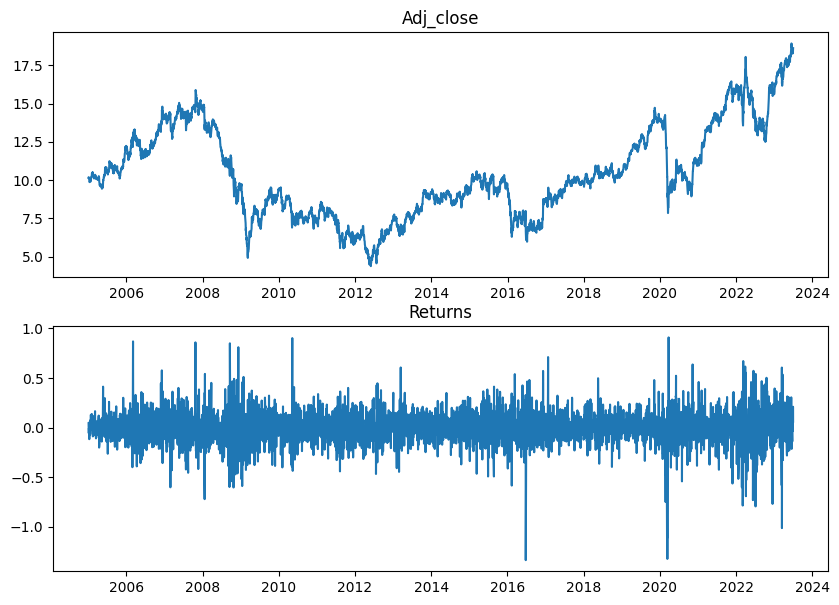

In [7]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(df['Adj_close'])
plt.title('Adj_close')

plt.subplot(2,1,2)
plt.plot(df['ret'])
plt.title('Returns')

Text(0.5, 1.0, 'Log Ret')

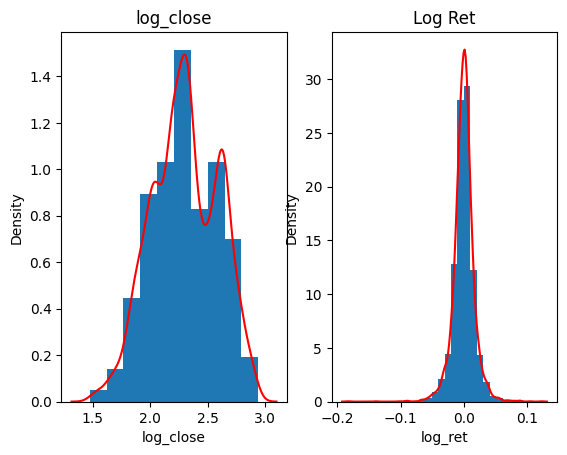

In [8]:
fig, axs = plt.subplots(1, 2)
# Adj_close
axs[0].hist(df['log_close'],density = True, bins = 10)
sns.kdeplot(df['log_close'], ax=axs[0], color='r')
axs[0].set_title('log_close')

# return
axs[1].hist(df['log_ret'],density = True, bins = 30)
sns.kdeplot(df['log_ret'], ax=axs[1], color='r')
axs[1].set_title('Log Ret')

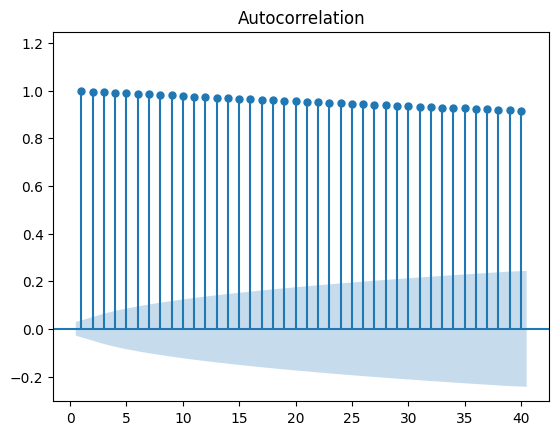

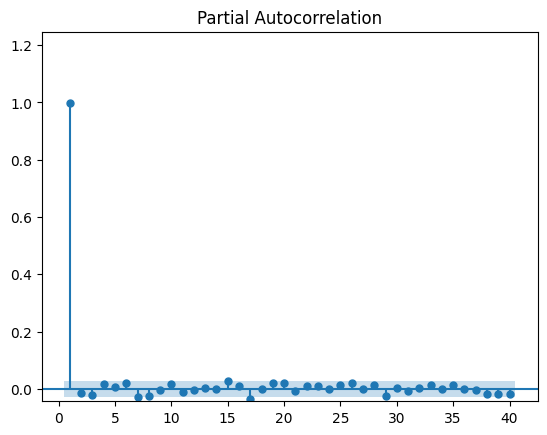

In [9]:
plot_acf(df['log_close'],lags = 40,zero = False,auto_ylims = True);
plot_pacf(df['log_close'],lags = 40,zero = False,auto_ylims = True);

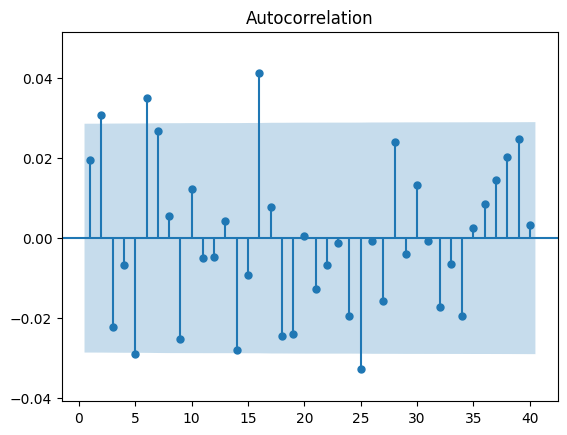

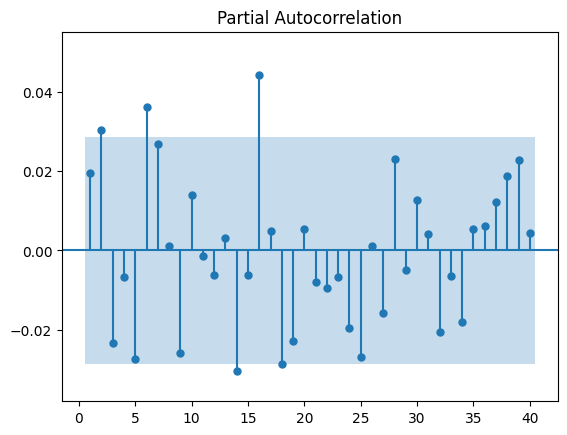

In [10]:
plot_acf(df['log_ret'][1:],lags = 40,zero = False,auto_ylims = True);
plot_pacf(df['log_ret'][1:],lags = 40,zero = False,auto_ylims = True);

Text(0.5, 1.0, 'Return Trend')

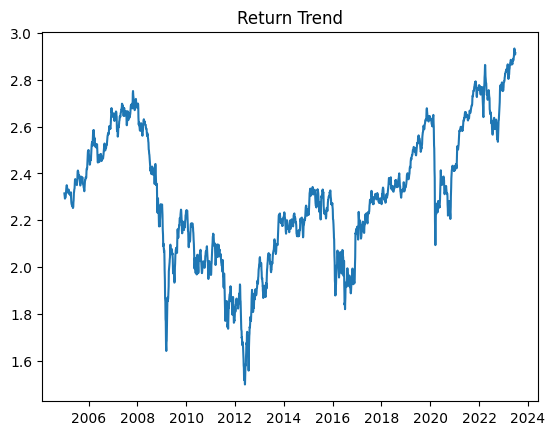

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
ret_decom = seasonal_decompose(df['log_close'],model='addictive',period=5)
plt.plot(ret_decom.trend)
plt.title('Return Trend')

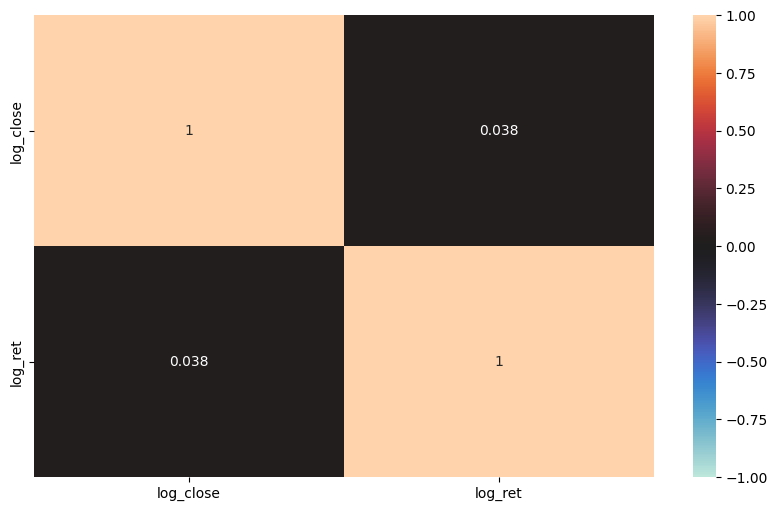

In [12]:
fig = plt.subplots(figsize=(10, 6))
corr = df[['log_close','log_ret']].corr()
sns.heatmap(corr,vmax=1, vmin=-1, center=0,annot=True)
plt.show()

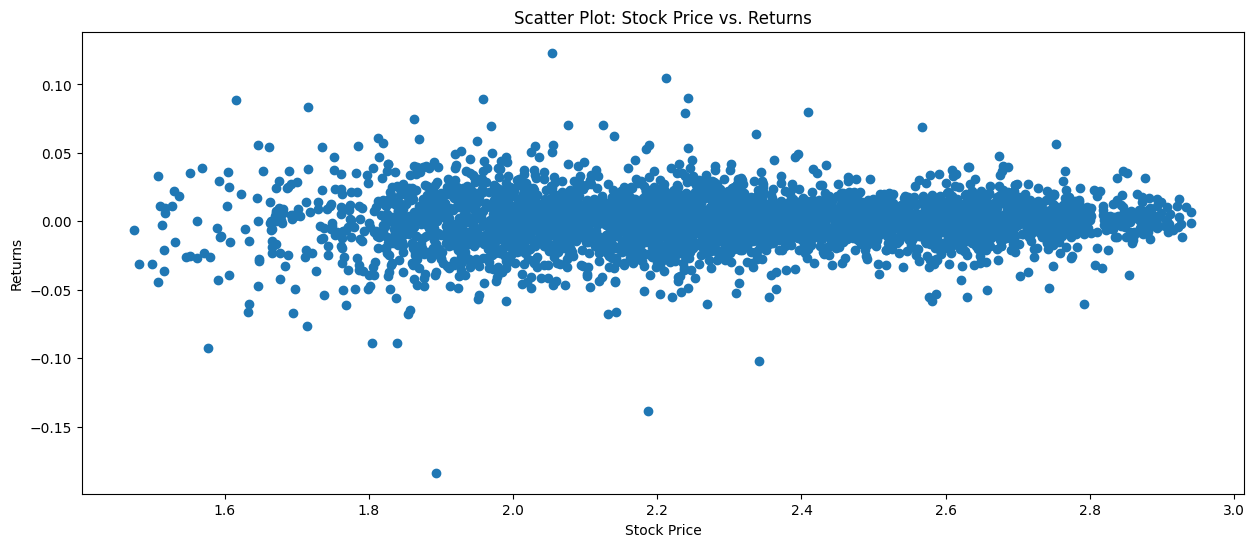

In [13]:
plt.figure(figsize = (15,6))
plt.scatter(df['log_close'], df['log_ret'])
plt.xlabel('Stock Price')
plt.ylabel('Returns')
plt.title('Scatter Plot: Stock Price vs. Returns')
plt.show()

In [14]:
# Calculate rolling volatility
volatility_week = df['log_ret'].groupby(df.index.day_of_week).std()
volatility_month = df['log_ret'].groupby(df.index.month).std()
volatility_year = df['log_ret'].groupby(df.index.year).std()* (252**0.5)


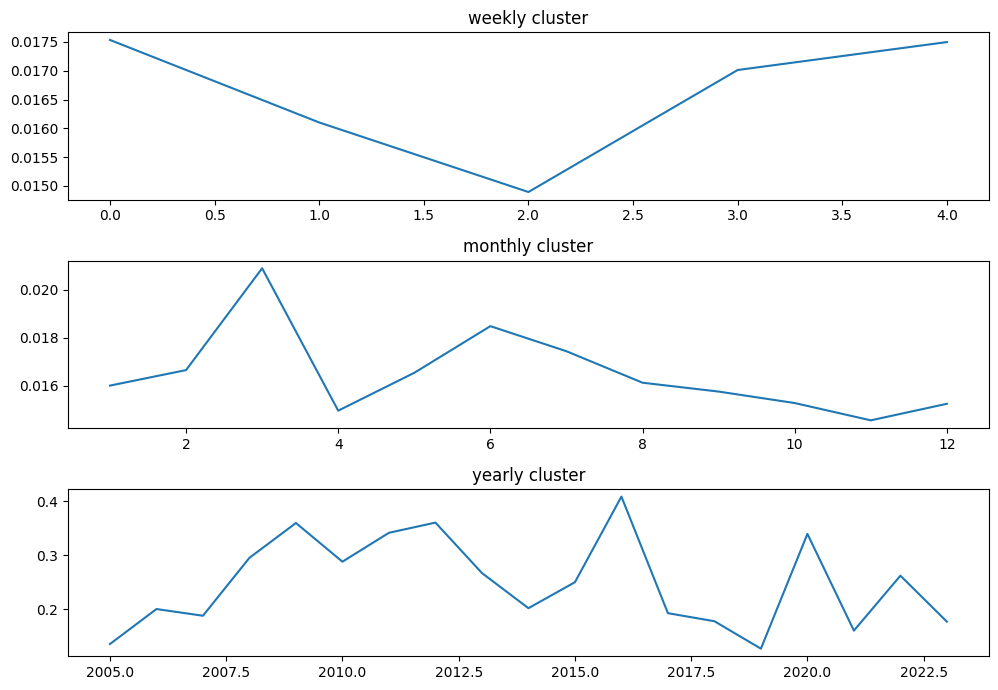

In [15]:
plt.figure(figsize=(10,7))
plt.subplot(3,1,1)
plt.plot(volatility_week.index, volatility_week)
plt.title('weekly cluster')

plt.subplot(3,1,2)
plt.plot(volatility_month.index, volatility_month)
plt.title('monthly cluster')

plt.subplot(3,1,3)
plt.plot(volatility_year.index, volatility_year)
plt.title('yearly cluster')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()